### `Text Mining`

Text mining, also known as text data mining, is the process of transforming unstructured text into a structured format to identify meaningful patterns and new insights. You can use text mining to analyze vast collections of textual materials to capture key concepts, trends and hidden relationships.

By applying advanced analytical techniques, companies are able to explore and discover hidden relationships within their unstructured data. 

Text is a one of the most common data types within databases. Since roughly 80% of data in the world resides in an unstructured format, text mining is an extremely valuable practice within organizations. Text mining tools and natural language processing (NLP) techniques, allow us to transform unstructured documents into a structured format to enable analysis and the generation of high-quality insights. This, in turn, improves the decision-making of organizations, leading to better business outcomes.

### **Example: SMS Spam Dataset**

In [1]:
import pandas as pd
import numpy as np

df_sms = pd.read_csv('sms_spam_collection.csv')
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### **Text Preprocessing**

In any machine learning task, cleaning or preprocessing the data is as important as model building if not more. And when it comes to unstructured data like text, this process is even more important.

There are many different types of text preprocessing steps which we can do on text data. But we need not do all of these all the times. We need to carefully choose the preprocessing steps based on our use case since that also play an important role.

For example, in sentiment analysis use case, we need not remove the emojis or emoticons as it will convey some important information about the sentiment. Similarly we need to decide based on our use cases.

In this study, the preprocessing method that we will discuss is a text processing method that focuses on text classification.

#### `Preprocessing Part 1`

**Converting to Lower Case**

Converting to lower case is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

This is more helpful for text featurization techniques like frequency, tfidf as it helps to combine the same words together thereby reducing the duplication and get correct counts / tfidf values.

This may not be helpful when we do tasks like Part of Speech tagging (where proper casing gives some information about Nouns and so on) and Sentiment Analysis (where upper casing refers to anger and so on)

In [2]:
def to_lower(text):
    return text.lower()

In [3]:
text_string = 'Summer December 10th 2019'
text_string = to_lower(text_string)
text_string

'summer december 10th 2019'

**Expands Contraction**

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe, for examples:
- I’ve done it  
- I’m here 
- You’re smart

Expanding contractions contributes to text standardization and helps in dimensionality reduction before forming word vectors.


In [4]:
import re

contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}
 
 
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
                                    # re.IGNORECASE: case insensitive
                                    # re.DOTALL: titik dianggap titik, bukan sebagai wildcard
 
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction
 
    expanded_text = contractions_pattern.sub(expand_match, text)    # dari singkatan, menjadi dijabarkan
    expanded_text = re.sub("'", "", expanded_text)                  # menghilangkan petik satu
    return expanded_text
 
def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [5]:
text_string = "i'm hungry"
text_string = main_contraction(text_string)
text_string

'i am hungry'

**Remove or Convert Number Into Text**

We usually remove numbers from the text like “1,2,3,4,5…” when we do text clustering or getting keyphrases as numbers does not give much importance to get the main words.

In [6]:
# cara mas iki
''.join(filter(lambda x: not x.isdigit(), text_string))

'i am hungry'

In [7]:
# list comprehension
''. join(char for char in text_string if not char.isdigit())

'i am hungry'

In [8]:
# regex
re.sub('\d+','',text_string)

'i am hungry'

In [9]:
def remove_number(text):
    return ''. join(char for char in text if not char.isdigit())

In [10]:
text_string = 'summer december 10th 1996'
text_string = remove_number(text_string)
text_string

'summer december th '

**Remove Punctuation**

One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the string.punctuation in python contains the following punctuation symbols

!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`

We can add or remove more punctuations as per our need.

In [11]:
from string import punctuation

In [12]:
# Cara Mas Arya
''.join(char for char in text_string if char.isalpha() or char.isspace())

'summer december th '

In [13]:
# Not In
''.join(char for char in text_string if char not in punctuation)

'summer december th '

In [14]:
def remove_punctuation(text):
    return ''.join(char for char in text if char not in punctuation)

In [15]:
text_string = 'There were Pep, Alex, and Carlo!'
text_string = remove_punctuation(text_string)
text_string

'There were Pep Alex and Carlo'

**Remove White Space**

Extra whitespaces and tabs do not add any information to text processing.

In [16]:
# Cara Mas Asyraf
re.sub('\s+', ' ', text_string)

'There were Pep Alex and Carlo'

In [17]:
# Split
' '.join(text_string.split())

'There were Pep Alex and Carlo'

In [18]:
def remove_whitespace(text):
    return ' '.join(text.split())

In [19]:
text_string = 'There were   Pep Alex and Carlo'
text_string = remove_whitespace(text_string)
text_string

'There were Pep Alex and Carlo'

**Remove Stopwords**

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them.

In [20]:
# pip install nltk

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mzulfikarmuslim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mzulfikarmuslim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
english_stopwords = stopwords.words('english')
english_stopwords.remove('not')

In [23]:
# Cara mas iki
' '.join(word for word in text_string.split() if word not in english_stopwords)

'There Pep Alex Carlo'

In [24]:
# Word Tokenize
' '.join(word for word in nltk.word_tokenize(text_string) if word not in english_stopwords)

'There Pep Alex Carlo'

In [25]:
def remove_stopword(text):
    return ' '.join(word for word in nltk.word_tokenize(text) if word not in english_stopwords)

In [26]:
text_string = 'there were pep alex and carlo'
text_string = remove_stopword(text_string)
text_string

'pep alex carlo'

**Combine All Preprocessing Method**

In [27]:
df_sms['message_to_lower'] = df_sms['message'].apply(to_lower)
df_sms['message_expand_contraction'] = df_sms['message_to_lower'].apply(main_contraction)
df_sms['message_remove_number'] = df_sms['message_expand_contraction'].apply(remove_number)
df_sms['message_remove_punctuation'] = df_sms['message_remove_number'].apply(remove_punctuation)
df_sms['message_remove_whitespace'] = df_sms['message_remove_punctuation'].apply(remove_whitespace)
df_sms['message_remove_stopword'] = df_sms['message_remove_whitespace'].apply(remove_stopword)
df_sms.head()

,label,message,message_to_lower,message_expand_contraction,message_remove_number,message_remove_punctuation,message_remove_whitespace,message_remove_stopword
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though


#### `Preprocessing Part 2`

There are many optional methods in text preprocessing part 2, including lemmatization and stemming. Then there are several other methods such as tokenization, ngrams, part of speech tagging and entity recognition.

**Stemming**

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form (From Wikipedia)

For example, if there are two words in the corpus `walks` and `walking`, then stemming will stem the suffix to make them `walk`. But say in another example, we have two words `console` and `consoling`, the stemmer will remove the suffix and make them `consol` which is not a proper english word.

In [28]:
from nltk.stem import SnowballStemmer

In [29]:
snowball_stemmer = SnowballStemmer('english')

def stem(text):
    stemmed_word = [snowball_stemmer.stem(word) for word in nltk.word_tokenize(text)]
    return ' '.join(stemmed_word)

In [30]:
text_string = 'caring cared carefully privately proposal walking'
text_string = stem(text_string)
text_string

'care care care privat propos walk'

We can see that words like `private` and `propose` have their `e` at the end chopped off due to stemming. This is not intented. What can we do for that? We can use Lemmatization in such cases.

**Lemmatization**

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mzulfikarmuslim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    lematized_word = [wordnet_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)]
    return ' '.join(lematized_word)

In [34]:
text_string = 'caring cared carefully privately proposal walks homes'
text_string = lemmatize(text_string)
text_string

'caring cared carefully privately proposal walk home'

**Apply Stemming or Lemmatization**

In [35]:
df_sms['message_prep_stem'] = df_sms['message_remove_stopword'].apply(stem)
df_sms['message_prep_lemma'] = df_sms['message_remove_stopword'].apply(lemmatize)
df_sms.head()

,label,message,message_to_lower,message_expand_contraction,message_remove_number,message_remove_punctuation,message_remove_whitespace,message_remove_stopword,message_prep_stem,message_prep_lemma
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though,nah not think goe usf live around though,nah not think go usf life around though


### **Text Exploration**

`Word Frequency`

Can be used to identify whether there are still words frequently occur but not meaningful

In [36]:
def kamus(text):
    text = text.str.extractall('([A-Za-z]+)')
    text.columns = ['check']
    b = text.reset_index(drop=True)
    text = b['check'].value_counts()

    kamus = pd.DataFrame({'kata':text.index, 'freq':text.values})
    kamus.index = kamus['kata']
    kamus.drop(columns='kata', inplace=True)
    return kamus

In [37]:
spam = kamus(df_sms['message_prep_lemma'][df_sms['label']=='spam'])
ham = kamus(df_sms['message_prep_lemma'][df_sms['label']=='ham'])

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

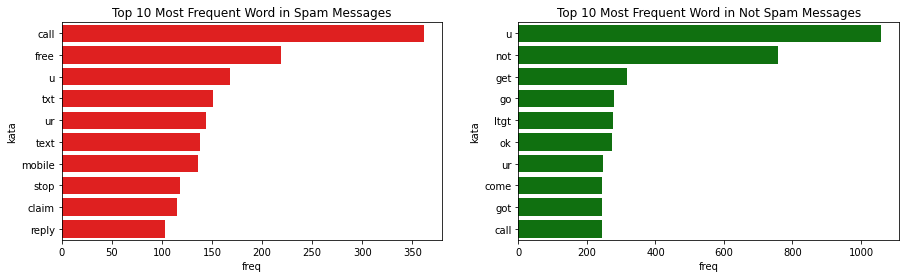

In [39]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.barplot(data=spam.head(10), x='freq', y=spam.index[:10], color='red')
plt.title('Top 10 Most Frequent Word in Spam Messages')

plt.subplot(122)
sns.barplot(data=ham.head(10), x='freq', y=ham.index[:10], color='green')
plt.title('Top 10 Most Frequent Word in Not Spam Messages')

plt.show()

`Length of Documents`

Can be used to identify whether there are significant difference between spam or not spam.

In [40]:
df_sms['message_length'] = df_sms['message_prep_lemma'].apply(len)

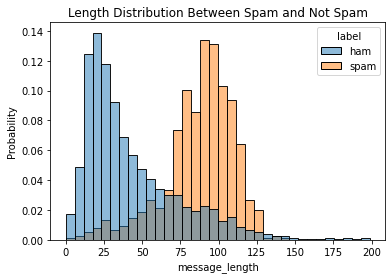

In [41]:
sns.histplot(data=df_sms[df_sms['message_length']<200], x='message_length', hue='label', stat='probability', common_norm=False)
plt.title('Length Distribution Between Spam and Not Spam')
plt.show()

- spam emails tend to have a higher number of characters.

`Word Cloud`

Can be used to identify whether there are still words frequently occur but not meaningful. It can be used also as comparison.


In [42]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

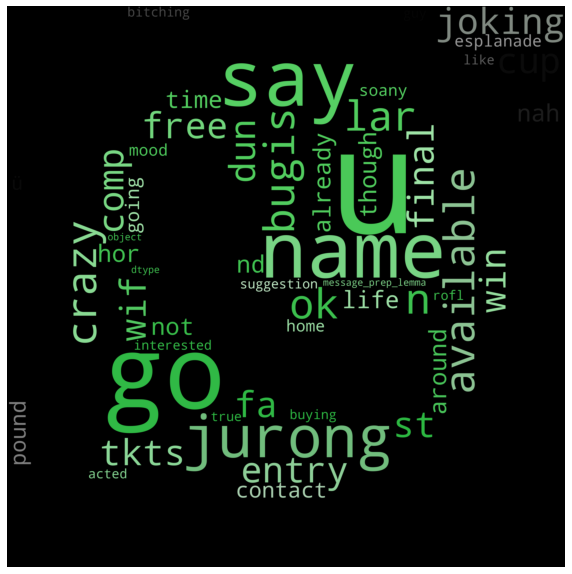

In [43]:
# Combining the image with dataset
Mask = np.array(Image.open('whatsapp-logo-1.png'))

# Generate word cloud image
wordcloud = WordCloud(
                stopwords=english_stopwords,
                mask=Mask,
                background_color='black',
                height=1500,
                width=1500
            ).generate(str(df_sms['message_prep_lemma']))


# Generate color image
image_color = ImageColorGenerator(Mask)

# Set figure size
plt.figure(figsize=(10,20))

# Display Image
plt.imshow(wordcloud.recolor(color_func=image_color), interpolation='hamming')

# No Axis Details
plt.axis('off')
plt.show()

### **Sentiment Analysis**

`TextBlob`

In [44]:
from textblob import TextBlob

In [45]:
df_sms['polarity'] = df_sms['message_prep_lemma'].map(lambda Text: TextBlob(Text).sentiment.polarity)
df_sms['subjectivity'] = df_sms['message_prep_lemma'].map(lambda Text: TextBlob(Text).sentiment.subjectivity)

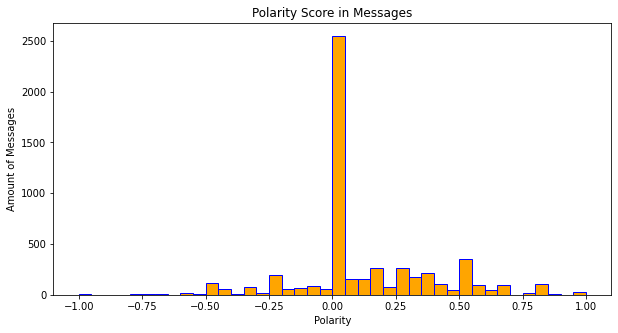

In [46]:
df_sms['polarity'].plot(kind='hist', bins=40, edgecolor='blue', color='orange', linewidth=1, figsize=(10,5))
plt.title('Polarity Score in Messages')
plt.xlabel('Polarity')
plt.ylabel('Amount of Messages')
plt.show()

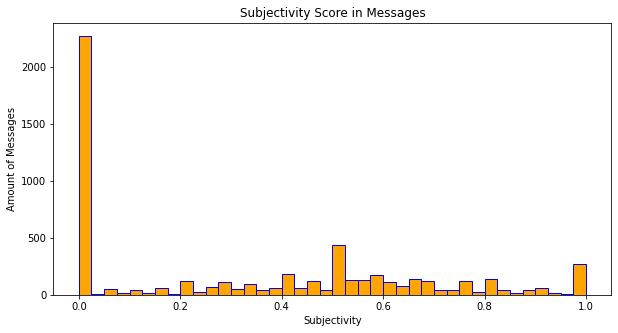

In [47]:
df_sms['subjectivity'].plot(kind='hist', bins=40, edgecolor='blue', color='orange', linewidth=1, figsize=(10,5))
plt.title('Subjectivity Score in Messages')
plt.xlabel('Subjectivity')
plt.ylabel('Amount of Messages')
plt.show()

`SentimentIntensityAnalyzer`

In [48]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [49]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled
             "Not bad at all"  # Capitalized negation
             ]

In [50]:
sentiments = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = sentiments.polarity_scores(sentence)
    print(f"{sentence:-<65} {str(vs)}")


VADER is smart, handsome, and funny.----------------------------- {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is smart, handsome, and funny!----------------------------- {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny.------------------------ {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
VADER is not smart, handsome, nor funny.------------------------- {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
The book was good.----------------------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'co

In [51]:
sentiments = SentimentIntensityAnalyzer()
df_sms['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df_sms['message_prep_lemma']]
df_sms['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df_sms['message_prep_lemma']]
df_sms['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df_sms['message_prep_lemma']]
df_sms['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df_sms['message_prep_lemma']]
df_sms.head()

,label,message,message_to_lower,message_expand_contraction,message_remove_number,message_remove_punctuation,message_remove_whitespace,message_remove_stopword,message_prep_stem,message_prep_lemma,message_length,polarity,subjectivity,Positive,Neutral,Negative,Compound
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...,82,0.2,0.683333,0.222,0.649,0.130,0.4019
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni,23,0.5,0.500000,0.577,0.423,0.000,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final...,free entry in a wkly comp to win fa cup final ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,106,0.4,0.733333,0.283,0.717,0.000,0.7964
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say,35,0.1,0.300000,0.000,1.000,0.000,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar...","nah i do not think he goes to usf, he lives ar...",nah i do not think he goes to usf he lives aro...,nah i do not think he goes to usf he lives aro...,nah not think goes usf lives around though,nah not think goe usf live around though,nah not think go usf life around though,39,0.0,0.000000,0.000,0.833,0.167,-0.1027


### **Bag of Words (Document Term Matrix)**

Bag of words is a method used to represent text for the machine learning model training process. This method utilizes the words in each document to create features. Bag of words utilizes word occurrences and discarding many structures, such as chapters, paragraphs, sentences and formatting

The process of making a bag of words consists of three stages:
- Tokenization: splitting each words
- Vocabulary building: vocabulary over all documents
- Encoding: count how often words show up

The results of processing text data with bags of words are stored in a kind of matrix or dataframe called a document term matrix.

`1. Term Frequency or CountVectorizer`

Term frequency is the measurement of how frequently a term or word occurs within a document. The easiest calculation is simply counting the number of times a word appears. 

In [53]:
corpus = [
    'fun learn fun',
    'can do all day',
    'hate feel',
    'do fun'
]

**ngram_range=(1, 1)**

**ngram_range=(1, 2)**

**ngram_range=(2, 2)**

**ngram_range=(3, 3)**

**ngram_range=(1, 3)**

`2. Term Frequency - Inverse Document Frequency (TF-IDF)`

It can be defined as the calculation of how relevant a word in a series or corpus is to a document. The meaning increases proportionally to the number of times in the document a word appears but is compensated by the word frequency in the corpus (data-set).

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [75]:
corpus = [
    'fun learn fun',
    'can do all day',
    'hate feel hate',
    'do fun'
]

**Interpretation**

- The score for `do` in the 1st Document index is small, because `do` also appears in the 3rd Document index.
- The `hate` score in the 2nd Document index is large, because the word `hate` appears 2 times in the 2nd Document index and it doesn't exist in the other Documents.
- The `fun` score in the 0th Document index is large because it appears twice in the document, but actually the weight is smaller than  `learn` because the word `fun` also appears in the 3rd Document index.

### **Text Classification**

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

`Change Target`

`Define Text and Target`

`Data Splitting`

`Vectorizing`

`Model Benchmarking`

`Predict Benchmark Model to Test Set`

**Interpretation**

- False Negative: actually spam, but predicted not to be spam (41)
- False Positive: not actually spam, but predicted spam (42)
- In the case of spam, False Positive is more dangerous because it could mean that important SMS goes to the spam tab and is not read


`Hyperparameter Tuning`

`Predict Tuned Model to Test Set`

Prediction results on the test set:
- Before tuning = 0.718
- After tuning = 0.765

`Model Evaluation`

After tuning, the False Positive value decreased from 42 to 24.

**Learning Curve**

In [1]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": text_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": 'precision'
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(best_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from Decision Tree')
ax.set_ylabel('Precision Score')

# Show the plot
plt.show()

**Feature Importances**

**Plot Tree**